<h1 style='text-align:center;font-size:30px;'>Importing Libraries</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print ('Libraries loaded')

Libraries loaded


<h1 style='text-align:center;font-size:30px;'>Python Scripts</h1>

In [3]:
file_path = r"C:\Users\pavan_kalbhat\Desktop\Folders Home\Excel sheets for Power Bi Practice\BI Developer Sample Dataset\BI Developer Sample Dataset (1).xlsx"

clubs = pd.read_excel(file_path, sheet_name='Club Table')
members = pd.read_excel(file_path, sheet_name='Members')
checkins = pd.read_excel(file_path, sheet_name='Checkins')
transactions = pd.read_excel(file_path, sheet_name='POS Transactions')
profit_centers = pd.read_excel(file_path, sheet_name='Profit Centers')
metrics = pd.read_excel(file_path, sheet_name='Metrics')
print ('Loaded the Files')

Loaded the Files


In [4]:
members['StartDate'] = pd.to_datetime(members['Start Date'], errors='coerce')
members['StatusDate'] = pd.to_datetime(members['StatusDate'], errors='coerce')
checkins['CheckinDate'] = pd.to_datetime(checkins['Checkin_Date'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')
print ('Removed errors')

Removed errors


In [5]:
total_checkins = len(checkins)
print("Total Checkins:", total_checkins)

Total Checkins: 105324


In [6]:
avg_checkins_member = checkins.groupby('MemberKey').size().mean()
print("Avg Checkins Per Member:", round(avg_checkins_member,2))

Avg Checkins Per Member: 3.45


In [7]:
checkins_by_club = checkins.groupby('Club_Key').size().reset_index(name='Checkins')
checkins_by_club

,Club_Key,Checkins
0,16,10181
1,17,2854
2,18,548
3,19,2683
4,20,2181
5,21,2979
6,23,14557
7,25,3
8,26,1
9,28,6962


In [8]:
avg_checkins_by_club = checkins.groupby('Club_Key')['MemberKey'].count() / checkins.groupby('Club_Key')['MemberKey'].nunique()
avg_checkins_by_club

Club_Key
16      4.477133
17      1.946794
18      1.294258
19      1.868680
20      1.837405
21      1.882427
23      4.270246
25      1.000000
26      1.000000
28      3.894678
29      4.088424
31      1.346049
32      1.334566
33      1.420712
34      1.316814
35      1.166667
36      1.000000
43      1.866705
293     1.000000
1165    3.211024
1353    2.166667
1355    1.846805
1356    4.224426
1582    2.923998
Name: MemberKey, dtype: float64

In [10]:
active_members = members[members['StatusDate'].isna()].shape[0]
print("Active Members:", active_members)

Active Members: 164991


In [11]:
monthly_new_members = members.groupby(
    members['StartDate'].dt.to_period('M')
).size()

print(monthly_new_members)

StartDate
2019-01    18753
2019-02     8726
2019-03    15584
2019-04     9900
2019-05    15808
2019-06    10370
2019-07    11952
2019-08    12005
2019-09    18534
2019-10     8551
2019-11    12212
2019-12    15072
2020-01    32393
2020-02    11720
2020-03     5284
2020-04        8
2020-05     1300
2020-06        1
Freq: M, dtype: int64


In [12]:
cancelled_members = members[members['StatusDate'].notna()].shape[0]
print("Cancelled Members:", cancelled_members)

Cancelled Members: 43182


In [13]:
total_revenue = transactions['subtotal'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 518793.85


In [14]:
revenue_by_club = transactions.groupby('Club_Key')['subtotal'].sum().reset_index()
revenue_by_club

,Club_Key,subtotal
0,16,12994.24
1,17,10621.46
2,18,8040.86
3,19,9694.77
4,20,7445.73
5,21,10993.06
6,23,31114.56
7,24,413.94
8,25,1161.00
9,26,867.80


<h1 style='text-align:center;font-size:30px;'>Club Performance</h1>

<p style='text-align:Left;font-size:20px;'>Checkins by Club</p>

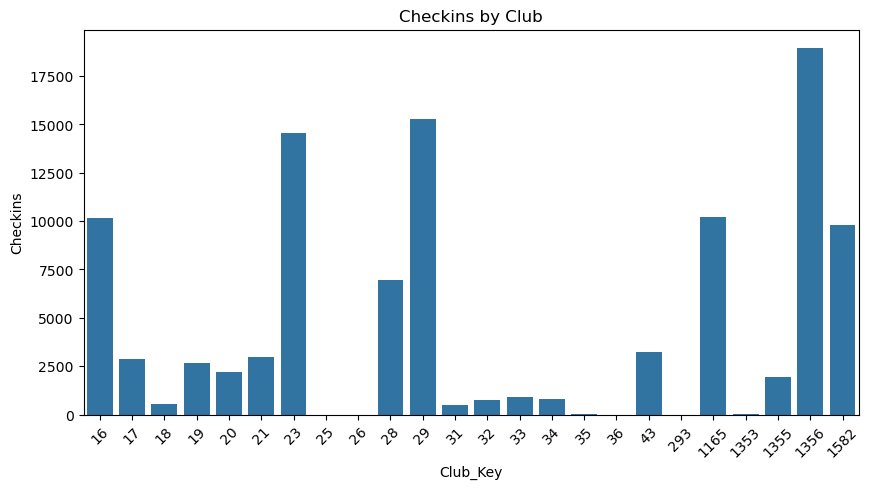

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=checkins_by_club, x='Club_Key', y='Checkins')
plt.title("Checkins by Club")
plt.xticks(rotation=45)
plt.show()

<p style='text-align:Left;font-size:20px;'>Revenue by Club</h1>

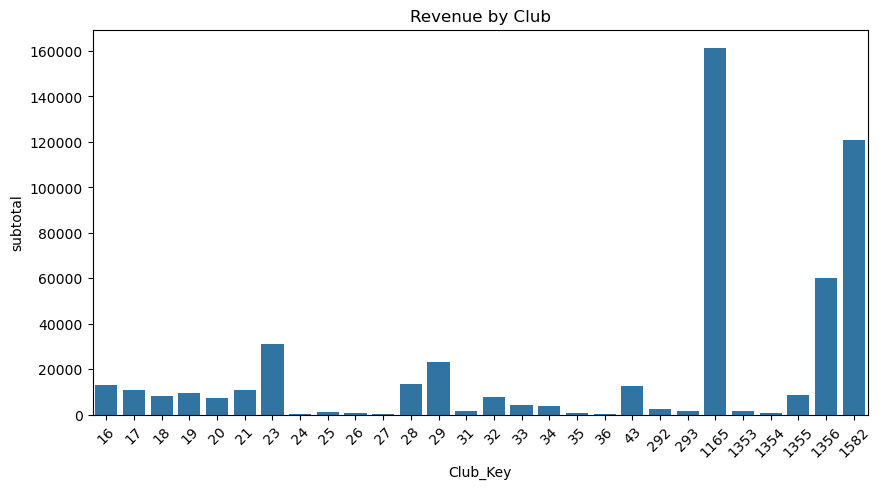

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(data=revenue_by_club, x='Club_Key', y='subtotal')
plt.title("Revenue by Club")
plt.xticks(rotation=45)
plt.show()

<p style='text-align:Left;font-size:20px;'>Member Status</p>

In [20]:
today = pd.Timestamp.today().normalize()

def member_status(cancel_date):
    if pd.isna(cancel_date):
        return "Active"
    elif cancel_date >= today:
        return "Pending Cancel"
    else:
        return "Expired"

members['Status'] = members['StatusDate'].apply(member_status)
print(members['Status'])

0         Expired
1          Active
2          Active
3          Active
4          Active
           ...   
208168     Active
208169     Active
208170     Active
208171     Active
208172     Active
Name: Status, Length: 208173, dtype: object


<h1 style='text-align:Center;font-size:30px;'>KPI Calculations</h1>

In [22]:
# checkins
total_checkins = len(checkins)
avg_checkins_member = checkins.groupby('MemberKey').size().mean()
checkins_by_club = checkins.groupby('Club_Key').size().reset_index(name='Checkins')

# members
active_members = members[members['Status']=="Active"].shape[0]
new_members = members[members['StartDate'].dt.month == today.month].shape[0]
cancelled_members = members[members['Status']=="Expired"].shape[0]

# revenue
total_revenue = transactions['subtotal'].sum()
revenue_by_club = transactions.groupby('Club_Key')['subtotal'].sum().reset_index()


<p style='text-align:Left;font-size:20px;'>Checkins Trend</p>

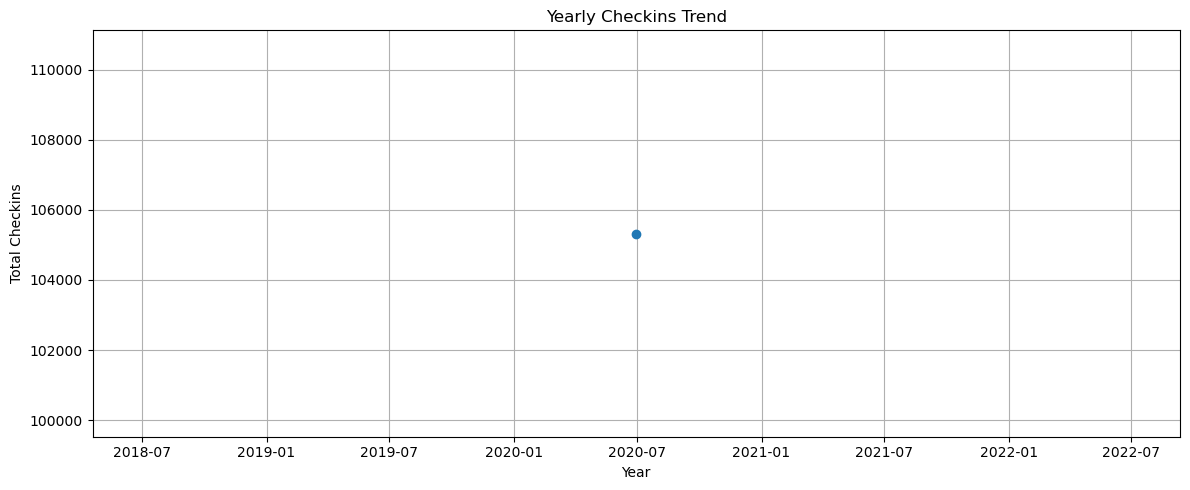

In [23]:
# Yearly checkins
yearly_checkins = (
    checkins
    .set_index('CheckinDate')
    .resample('ME')
    .size()
)

plt.figure(figsize=(12,5))
plt.plot(yearly_checkins.index, yearly_checkins.values, marker='o')

plt.title("Yearly Checkins Trend")
plt.xlabel("Year")
plt.ylabel("Total Checkins")
plt.grid(True)
plt.tight_layout()
plt.show()

<p style='text-align:Left;font-size:20px;'>Revenue Trend</p>

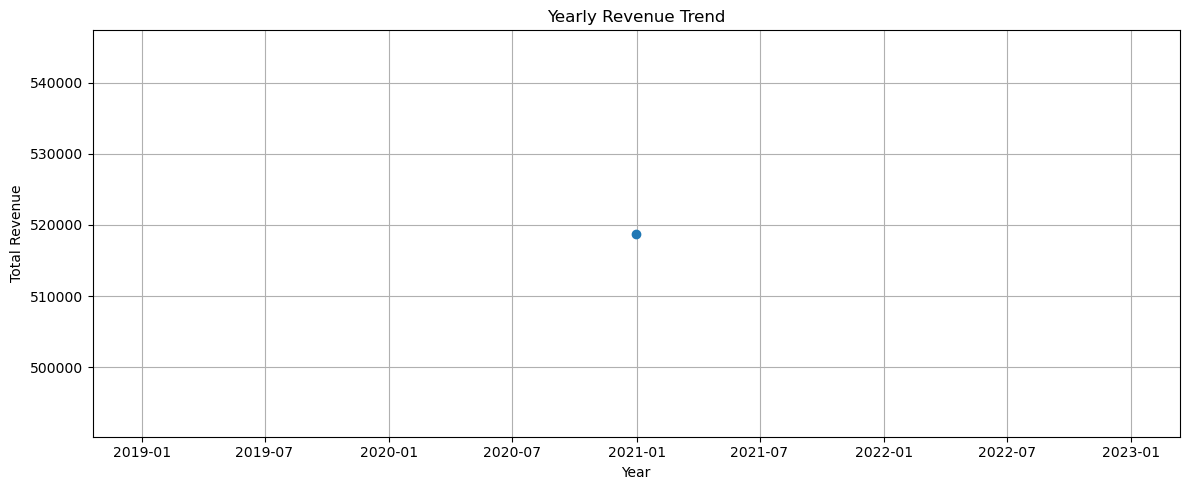

In [24]:
# Yearly revenue
yearly_revenue = (
    transactions
    .set_index('TransactionDate')['subtotal']
    .resample('YE')
    .sum()
)

plt.figure(figsize=(12,5))
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o')

plt.title("Yearly Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

<p style='text-align:Left;font-size:20px;'>Member Added vs Cancelled</p>

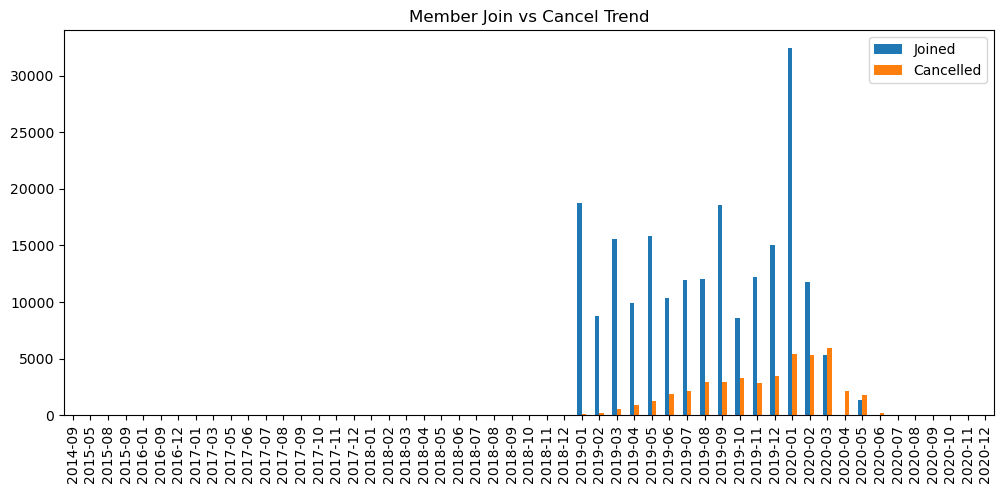

In [25]:
join_cancel = pd.DataFrame({
    "Joined": members.groupby(members['StartDate'].dt.to_period('M')).size(),
    "Cancelled": members.groupby(members['StatusDate'].dt.to_period('M')).size()
}).fillna(0)

join_cancel.plot(kind='bar', figsize=(12,5))
plt.title("Member Join vs Cancel Trend")
plt.show()

<h1 style='text-align:Center;font-size:30px;'>Member Behavior</h1>

<p style='text-align:Left;font-size:20px;'>Member Status Distribution</p>

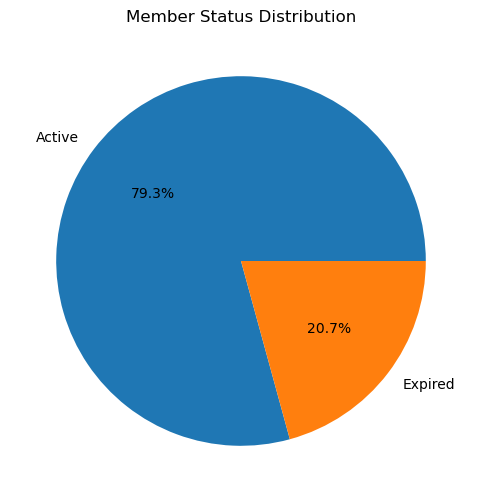

In [26]:
members['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Member Status Distribution")
plt.ylabel("")
plt.show()

<p style='text-align:Left;font-size:20px;'>Visits per Member Distribution</p>

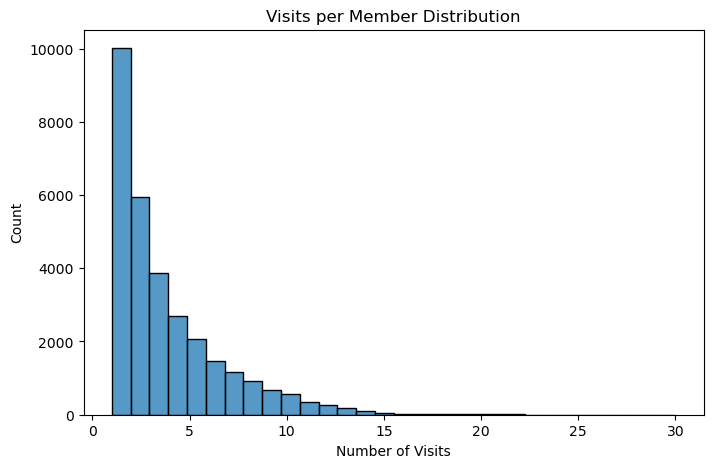

In [27]:
visits = checkins.groupby('MemberKey').size()

plt.figure(figsize=(8,5))
sns.histplot(visits, bins=30)
plt.title("Visits per Member Distribution")
plt.xlabel("Number of Visits")
plt.show()

<p style='text-align:Left;font-size:20px;'>Avg Checkins KPI Display</p>

In [28]:
print("Total Checkins:", total_checkins)
print("Avg Checkins Per Member:", round(avg_checkins_member,2))
print("Active Members:", active_members)
print("Cancelled Members:", cancelled_members)
print("Total Revenue:", total_revenue)

Total Checkins: 105324
Avg Checkins Per Member: 3.45
Active Members: 164991
Cancelled Members: 43182
Total Revenue: 518793.85


<h1 style='text-align:center;font-size:30px;'>Revenue Analysis</h1>

<p style='text-align:Left;font-size:20px;'>Revenue by Profit Center</p>

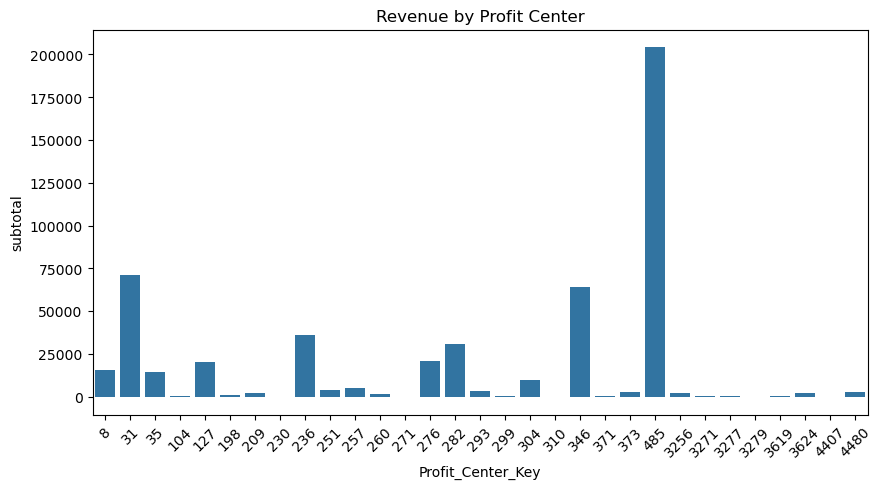

In [29]:
rev_pc = transactions.groupby('Profit_Center_Key')['subtotal'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=rev_pc, x='Profit_Center_Key', y='subtotal')
plt.title("Revenue by Profit Center")
plt.xticks(rotation=45)
plt.show()

<p style='text-align:Left;font-size:20px;'>Top 10 Members by Spending</p>

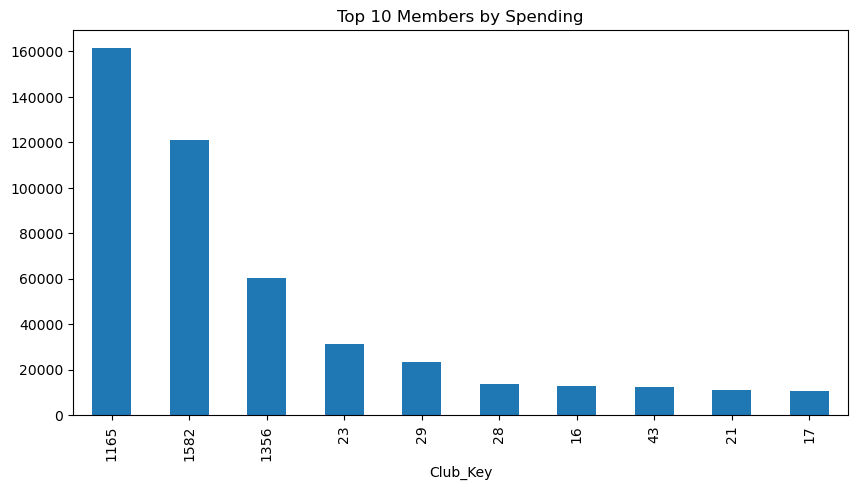

In [30]:
top_members = transactions.groupby('Club_Key')['subtotal'].sum().nlargest(10)

top_members.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Members by Spending")
plt.show()